In [2]:
import random
import math
import statistics as st
import matplotlib.pyplot as plt

In [3]:
#heads is 1
#tails is 0

def coin_flipper():
    return random.randint(0, 1)

def flipper_count(n=(2**16)):
    heads = 0
    tails = 0
    for _ in range(n):
        if coin_flipper() == 1:
            heads += 1
        else:
            tails += 1
    return (heads, tails)
    
def flipper_intervals():
    return [flipper_count(2**x) for x in [0, 1, 2, 4, 8, 16]]
    


In [4]:
%matplotlib inline

In [49]:
y = flipper_intervals()

In [50]:
print(y)

[(0, 1), (1, 1), (3, 1), (7, 9), (131, 125), (32648, 32888)]


In [5]:
def heads_tails_diff(flips):
    return [h - t for h, t in flips]

def heads_tails_ratio(flips):
    return [h/t for h, t in flips]

In [52]:
diffs = heads_tails_diff(y)
ratio = heads_tails_ratio(y)

In [53]:
print(diffs)
print(ratio)

[-1, 0, 2, -2, 6, -240]
[0.0, 1.0, 3.0, 0.7777777777777778, 1.048, 0.9927025054731209]


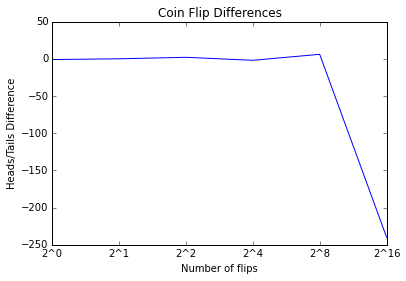

In [54]:
x1 = ["2^0", "2^1", "2^2", "2^4", "2^8", "2^16"]
plt.plot(diffs)
plt.xticks([0, 1, 2, 3, 4, 5], x1)
plt.ylabel("Heads/Tails Difference")
plt.xlabel("Number of flips")
plt.title("Coin Flip Differences")

In the early stages, the difference in number of heads and number of tails is very small, as we would expect. As the number of flips increases, the difference will grow, though it is still relatively small compared to the total number of flips.

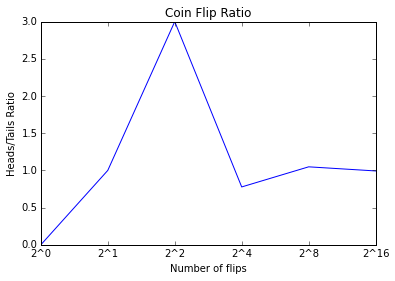

In [55]:
x1 = ["2^0", "2^1", "2^2", "2^4", "2^8", "2^16"]
plt.plot(ratio)
plt.xticks([0, 1, 2, 3, 4, 5], x1)
plt.ylabel("Heads/Tails Ratio")
plt.xlabel("Number of flips")
plt.title("Coin Flip Ratio")

The ratio graph shows exactly what we would expect. Early on, the ratio of heads to tails is large (for example, three to one after four flips). But as the number of flips grows, the ratio approaches one to one.

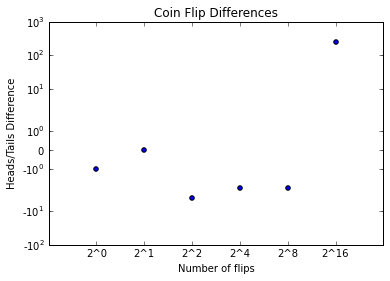

In [56]:
x1 = ["2^0", "2^1", "2^2", "2^4", "2^8", "2^16"]
diff = [-1, 0, -4, -2, -2, 250]
plt.scatter(range(6), diff)
plt.yscale("symlog")
plt.xticks(range(6), x1)
plt.ylabel("Heads/Tails Difference")
plt.xlabel("Number of flips")
plt.title("Coin Flip Differences")
plt.show()

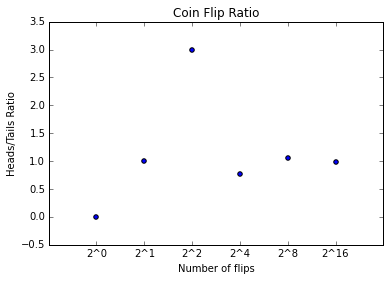

In [57]:
x1 = ["2^0", "2^1", "2^2", "2^4", "2^8", "2^16"]
plt.scatter(range(6), ratio)
plt.xticks(range(6), x1)
plt.ylabel("Heads/Tails Ratio")
plt.xlabel("Number of flips")
plt.title("Coin Flip Ratio")

# MEAN and STANDARD DEVIATION

In [58]:
def flip_trials(num_trials):
    return [flipper_count(2**16) for trial in range(num_trials)]

In [59]:
trials = flip_trials(20)

In [60]:
print(trials)

[(32741, 32795), (32874, 32662), (33072, 32464), (32493, 33043), (32569, 32967), (32884, 32652), (33006, 32530), (32516, 33020), (32863, 32673), (32970, 32566), (32978, 32558), (32784, 32752), (32766, 32770), (32861, 32675), (32834, 32702), (32831, 32705), (32755, 32781), (32888, 32648), (32959, 32577), (32741, 32795)]


In [62]:
trial_diffs = heads_tails_diff(trials)
trial_ratios = heads_tails_ratio(trials)

In [63]:
print(trial_diffs)
print(trial_ratios)

[-54, 212, 608, -550, -398, 232, 476, -504, 190, 404, 420, 32, -4, 186, 132, 126, -26, 240, 382, -54]
[0.9983534075316359, 1.0064907231645337, 1.0187284376540167, 0.983355022243743, 0.9879273212606546, 1.0071052309200048, 1.0146326467875808, 0.9847365233192005, 1.0058151990940531, 1.0124055763679911, 1.0129000552859513, 1.0009770395701025, 0.9998779371376258, 1.0056924254016832, 1.0040364503700079, 1.0038526219232533, 0.9992068576309447, 1.007351139426611, 1.0117260644012647, 0.9983534075316359]


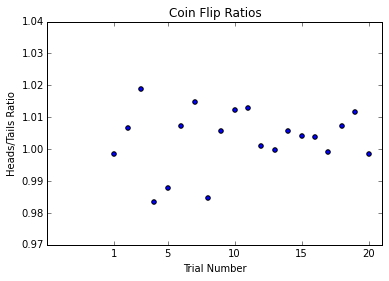

In [80]:
x1 = ["1", "5", "10", "15", "20"]
plt.scatter(range(20), trial_ratios)
plt.xticks([0, 4, 9, 14, 19], x1)
plt.ylabel("Heads/Tails Ratio")
plt.xlabel("Trial Number")
plt.title("Coin Flip Ratios")

In [6]:
def get_mean(nums):
    return st.mean(nums)

def standard_dev(nums):
    return st.stdev(nums)

In [86]:
mean_trials = get_mean(trial_ratios)
stdev_trials = standard_dev(trial_ratios)

In [87]:
print(mean_trials)
print(stdev_trials)

1.0031762043511248
0.00953586635362274


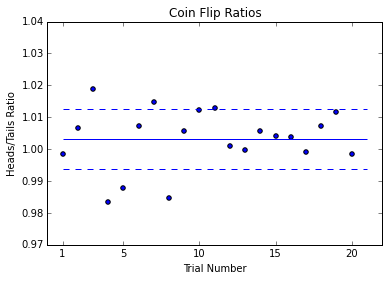

In [92]:
x1 = ["1", "5", "10", "15", "20"]

plt.scatter(range(20), trial_ratios)
plt.xticks([0, 4, 9, 14, 19], x1)
plt.ylabel("Heads/Tails Ratio")
plt.xlabel("Trial Number")
plt.title("Coin Flip Ratios")
plt.hlines(mean_trials, xmin=0, xmax=20, color="blue")
plt.hlines([mean_trials + stdev_trials, mean_trials - stdev_trials], xmin=0, xmax=20, linestyles="dashed", color="blue")

It's interesting to see that the earlier trials seem to be further outside the standard deviation, and there are more of them outside the standard deviation. As the number of trials increases towards 20, the ratio is closer to the mean and within the standard deviation. It's probably just due to coincidence, but we could run it again to see what happens.

In [93]:
trials2 = flip_trials(20)

In [94]:
trial_diffs2 = heads_tails_diff(trials2)
trial_ratios2 = heads_tails_ratio(trials2)

In [95]:
mean_trials = get_mean(trial_ratios2)
stdev_trials = standard_dev(trial_ratios2)

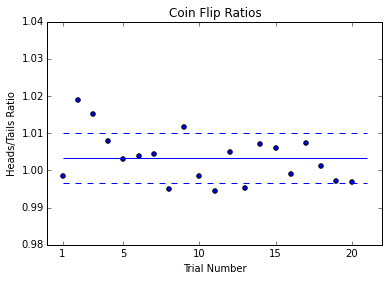

In [97]:
x1 = ["1", "5", "10", "15", "20"]

plt.scatter(range(20), trial_ratios2)
plt.xticks([0, 4, 9, 14, 19], x1)
plt.ylabel("Heads/Tails Ratio")
plt.xlabel("Trial Number")
plt.title("Coin Flip Ratios")
plt.hlines(mean_trials, xmin=0, xmax=20, color="blue")
plt.hlines([mean_trials + stdev_trials, mean_trials - stdev_trials], xmin=0, xmax=20, linestyles="dashed", color="blue")

Well, same trend with this one. Less variance as the trials move on.

In [17]:
hundred_trials = [flipper_count(100) for trial in range(100000)]

In [18]:
hundred_ratios = [trial[0] / 100 for trial in hundred_trials]

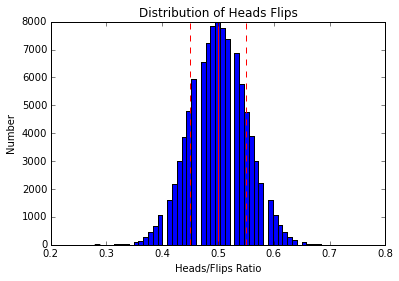

In [19]:
plt.hist(hundred_ratios, bins=50)
plt.xlabel("Heads/Flips Ratio")
plt.ylabel("Number")
plt.title("Distribution of Heads Flips")

ymin, ymax = plt.ylim()
heads_mean = st.mean(hundred_ratios)
heads_stdev = st.stdev(hundred_ratios)
plt.vlines(heads_mean, ymin, ymax, color="red")
plt.vlines([heads_mean - heads_stdev, heads_mean + heads_stdev], ymin, ymax, linestyles="dashed", color="red")
plt.show()

In [21]:
thousand_trials = [flipper_count(1000) for trial in range(100000)]
thousand_ratios = [trial[0] / 1000 for trial in thousand_trials]

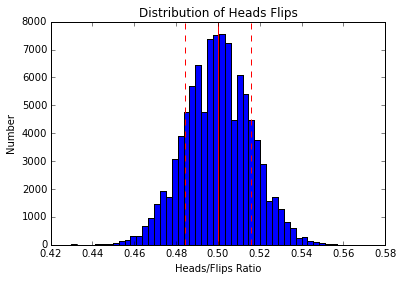

In [26]:
plt.hist(thousand_ratios, bins=50)
plt.xlabel("Heads/Flips Ratio")
plt.ylabel("Number")
plt.title("Distribution of Heads Flips")

ymin, ymax = plt.ylim()
th_heads_mean = st.mean(thousand_ratios)
th_heads_stdev = st.stdev(thousand_ratios)
plt.vlines(th_heads_mean, ymin, ymax, color="red")
plt.vlines([th_heads_mean - th_heads_stdev, th_heads_mean + th_heads_stdev], ymin, ymax, linestyles="dashed", color="red")
plt.show()

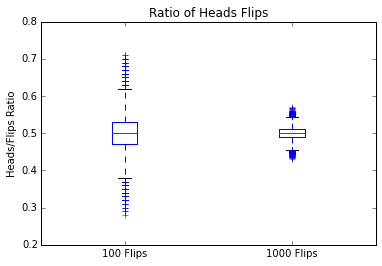

In [34]:
plt.boxplot([hundred_ratios, thousand_ratios])
ymin, ymax = plt.ylim()
plt.ylim(ymin, ymax)
plt.title("Ratio of Heads Flips")   
plt.ylabel("Heads/Flips Ratio")
plt.xticks(range(1,3), ["100 Flips", "1000 Flips"])
plt.show()